In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df=pd.read_csv('data/gdp_percapita.csv')

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN
5,Afghanistan,2013,2264.317575,NaN


In [5]:
internet_df=pd.read_csv('data/internet_use.csv')

In [6]:
print(internet_df.head(6))

  Country or Area  Year             Value Value Footnotes
0     Afghanistan  2014              6.39             NaN
1     Afghanistan  2013               5.9             NaN
2     Afghanistan  2012  5.45454545454545             NaN
3     Afghanistan  2011                 5             NaN
4     Afghanistan  2010                 4             NaN
5     Afghanistan  2009              3.55             NaN


In [7]:
print("GDP Shap: ", gdp_df.shape)
print("Intrnet Shape: ", internet_df.shape)

GDP Shap:  (6608, 4)
Intrnet Shape:  (4676, 4)


In [8]:
internet_df.dtypes

Country or Area    object
Year               object
Value              object
Value Footnotes    object
dtype: object

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
print(gdp_df.tail(6))

     Country or Area                                      Year        Value  \
6602        Zimbabwe                                      1993  3033.504852   
6603        Zimbabwe                                      1992  3054.889178   
6604        Zimbabwe                                      1991  3426.598094   
6605        Zimbabwe                                      1990  3324.348171   
6606   footnoteSeqID                                  Footnote          NaN   
6607               2  Excludes South Sudan after July 9, 2011.          NaN   

      Value Footnotes  
6602              NaN  
6603              NaN  
6604              NaN  
6605              NaN  
6606              NaN  
6607              NaN  


In [11]:
print(internet_df.tail(6))

     Country or Area                                               Year  \
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             177                     Pew Internet Project, Internet   
4673             178  Estimated based on Survey's results. Populatio...   
4674             179                     Preliminary. Country estimate.   
4675             180  The methodology used to estimated the figure f...   

                                     Value  \
4670                                   NaN   
4671                                   NaN   
4672   Broadband and cell phone statistics   
4673                                   NaN   
4674                                   NaN   
4675                                   NaN   

                                        Value Footnotes  
4670                                                NaN  
4671                               

In [12]:
gdp_df=gdp_df.drop('Value Footnotes',axis=1)

In [13]:
internet_df=internet_df.drop('Value Footnotes',axis=1)

In [14]:
internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'Internet_Users_Pct'}, inplace=True)

In [15]:
gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'}, inplace=True)

In [16]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545
3,Afghanistan,2011,5
4,Afghanistan,2010,4
...,...,...,...
4671,176,NTIA/CPS survey.,NaN
4672,177,"Pew Internet Project, Internet",Broadband and cell phone statistics
4673,178,Estimated based on Survey's results. Populatio...,NaN
4674,179,Preliminary. Country estimate.,NaN


In [17]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df)

In [18]:
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.39,2249.253738
1,Afghanistan,2013,5.9,2264.317575
2,Afghanistan,2012,5.45454545454545,2220.481526
3,Afghanistan,2011,5,2037.608607
4,Afghanistan,2010,4,2093.743565
...,...,...,...,...
3433,Zimbabwe,1996,0.016790483892511,3520.430146
3434,Zimbabwe,1995,0.00768353991953285,3226.413930
3435,Zimbabwe,1994,0.00173927955909959,3263.934978
3436,Zimbabwe,1990,0,3324.348171


In [19]:
gdp_and_internet_use_sub = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2004')|(gdp_and_internet_use['Year']=='2009')|(gdp_and_internet_use['Year']=='2014')]

In [20]:
gdp_and_internet_use_sub

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.39,2249.253738
5,Afghanistan,2009,3.55,1881.777626
10,Afghanistan,2004,0.105809030021958,1284.127338
13,Albania,2014,60.1,11828.232264
18,Albania,2009,41.2,10528.778102
...,...,...,...,...
3398,Zambia,2009,6.31,2917.522504
3403,Zambia,2004,2.01354953218533,2261.771409
3415,Zimbabwe,2014,19.89,2955.240287
3420,Zimbabwe,2009,11.36,1925.364381


In [21]:
gdp_and_internet_use_2004 = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2004')]
gdp_and_internet_use_2009 = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2009')]
gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2014')]

In [22]:
gdp_and_internet_use_2004

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
10,Afghanistan,2004,0.105809030021958,1284.127338
23,Albania,2004,2.42038779776014,7738.542836
44,Algeria,2004,4.63447508776537,9898.310490
66,Angola,2004,0.464814617985909,5568.959139
86,Antigua and Barbuda,2004,24.2665437161785,18742.463741
...,...,...,...,...
3340,Uruguay,2004,17.0630983403661,12479.966872
3362,Uzbekistan,2004,2.59372542084924,3221.189333
3383,Vanuatu,2004,4.74660261917533,2796.426115
3403,Zambia,2004,2.01354953218533,2261.771409


In [23]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1360,Iceland,2014,98.16,49911.069825


In [24]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3066,Timor-Leste,2014,1.14,3264.739189


# 2009

In [25]:
gdp_and_internet_use_2009[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1365,Iceland,2009,93,48428.312438


In [26]:
gdp_and_internet_use_2009[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3071,Timor-Leste,2009,0.185251509799805,2724.834868


In [27]:
gdp_and_internet_use_2004[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
343,Belize,2004,9.8,7327.474691


In [28]:
gdp_and_internet_use_2004[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
2111,Myanmar,2004,0.024337392002823,1696.88176


In [29]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1777,Luxembourg,2014,94.67,108911.348894


In [30]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
519,Burundi,2014,1.38,886.235777


In [ ]:
gdp_and_internet_use_2004[]

AttributeError: 'PathCollection' object has no attribute 'set_xticks'

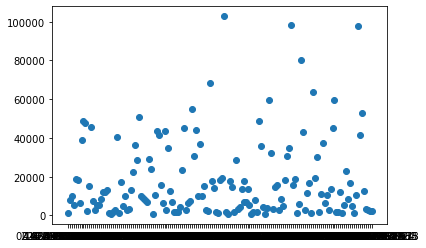

In [90]:
o4=plt.scatter(gdp_and_internet_use_2004.Internet_Users_Pct, gdp_and_internet_use_2004.GDP_Per_Capita
           )

o4.set_xticks(np.arange(0, 100, step=20)) 

#plt.xticks([20, 40, 60, 80], ['Twenty %', 'Forty %', 'Sixty %', 'Eighty %'],
       #rotation=20)

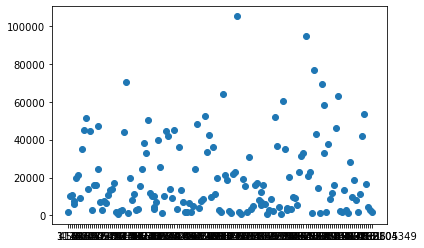

In [91]:
o9=plt.scatter(gdp_and_internet_use_2009.Internet_Users_Pct, gdp_and_internet_use_2009.GDP_Per_Capita
           )

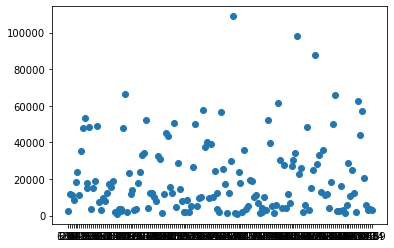

In [92]:
o14=plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita
           )

# omg numbers